# Food Vision with TensorFlow

Determining the type of food from images by neural network

In [1]:
# Check TensorFlow version
import tensorflow as tf
tf.__version__

'2.11.0'

In [ ]:
# Install the last version
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.2 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorboard
    Found existing i

## Data

The dataset contains 101 categories of different types of food.

The data was taken from Kaggle: https://www.kaggle.com/datasets/kmader/food41

### Preparing the data

Download data from Kaggle and prepare test and train sets 

In [ ]:
#!unzip '/content/drive/MyDrive/food_vision/archive.zip' -d '/content/drive/MyDrive/food_vision'

In [ ]:
for dirpath, dirnames, filenames in os.walk('/content/drive/MyDrive/food_vision/images'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')


There are 101 directories and 0 images in /content/drive/MyDrive/food_vision/images
There are 0 directories and 1000 images in /content/drive/MyDrive/food_vision/images/apple_pie
There are 0 directories and 1000 images in /content/drive/MyDrive/food_vision/images/baby_back_ribs
There are 0 directories and 1000 images in /content/drive/MyDrive/food_vision/images/baklava
There are 0 directories and 1000 images in /content/drive/MyDrive/food_vision/images/beef_carpaccio
There are 0 directories and 1000 images in /content/drive/MyDrive/food_vision/images/beef_tartare
There are 0 directories and 1000 images in /content/drive/MyDrive/food_vision/images/beet_salad
There are 0 directories and 1000 images in /content/drive/MyDrive/food_vision/images/beignets
There are 0 directories and 1000 images in /content/drive/MyDrive/food_vision/images/bibimbap
There are 0 directories and 1000 images in /content/drive/MyDrive/food_vision/images/bread_pudding
There are 0 directories and 1000 images in /con

In [ ]:
# Get labels
import json
def get_labels(path):
  with open(path) as f:
    return json.load(f)

In [ ]:
train_labels = get_labels('/content/drive/MyDrive/food_vision/meta/meta/train.json')
test_labels = get_labels('/content/drive/MyDrive/food_vision/meta/meta/test.json')

In [ ]:
test_labels['apple_pie'][:10]

['apple_pie/1011328',
 'apple_pie/101251',
 'apple_pie/1034399',
 'apple_pie/103801',
 'apple_pie/1038694',
 'apple_pie/1047447',
 'apple_pie/1068632',
 'apple_pie/110043',
 'apple_pie/1106961',
 'apple_pie/1113017']

In [ ]:
classes = [line.split('\n')[0] for line in open('/content/drive/MyDrive/food_vision/meta/meta/classes.txt')]
classes[:5]

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']

In [ ]:
import os
import shutil
# Split data into train and test datasets

for i in classes:
  os.makedirs('/content/drive/MyDrive/food_vision/test/' + i)
  for j in test_labels[i]:
    original_path = '/content/drive/MyDrive/food_vision/images/' + j +'.jpg'
    new_path = '/content/drive/MyDrive/food_vision/' + 'test/' + j +'.jpg'
    shutil.copy2(original_path, new_path)

for i in classes:
  os.makedirs('/content/drive/MyDrive/food_vision/train/' + i)
  for j in train_labels[i]:
    original_path = '/content/drive/MyDrive/food_vision/images/' + j +'.jpg'
    new_path = '/content/drive/MyDrive/food_vision/' + 'train/' + j +'.jpg'
    shutil.copy2(original_path, new_path)


In [ ]:
shutil.make_archive('train', 'zip', '/content/drive/MyDrive/food_vision/train')
shutil.make_archive('test', 'zip', '/content/drive/MyDrive/food_vision/test')

'/content/test.zip'

In [ ]:
!cp /content/test.zip /content/drive/MyDrive/food_vision

In [ ]:
!cp /content/train.zip /content/drive/MyDrive/food_vision

### Inspect and visualize the data

In [2]:
# Unzip train.zip
!unzip '/content/drive/MyDrive/food_vision/train.zip' -d '/content/train'

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/train/strawberry_shortcake/2215004.jpg  
  inflating: /content/train/strawberry_shortcake/2220646.jpg  
  inflating: /content/train/strawberry_shortcake/2221123.jpg  
  inflating: /content/train/strawberry_shortcake/2221251.jpg  
  inflating: /content/train/strawberry_shortcake/2229025.jpg  
  inflating: /content/train/strawberry_shortcake/2233253.jpg  
  inflating: /content/train/strawberry_shortcake/2234323.jpg  
  inflating: /content/train/strawberry_shortcake/2239071.jpg  
  inflating: /content/train/strawberry_shortcake/2244021.jpg  
  inflating: /content/train/strawberry_shortcake/2245360.jpg  
  inflating: /content/train/strawberry_shortcake/2259069.jpg  
  inflating: /content/train/strawberry_shortcake/2259652.jpg  
  inflating: /content/train/strawberry_shortcake/2266581.jpg  
  inflating: /content/train/strawberry_shortcake/2271614.jpg  
  inflating: /content/train/strawberry_shortcake/2

In [1]:
# Unzip test.zip
!unzip '/content/drive/MyDrive/food_vision/test.zip' -d '/content/test'

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/test/ramen/1000325.jpg  
  inflating: /content/test/ramen/1006057.jpg  
  inflating: /content/test/ramen/1009072.jpg  
  inflating: /content/test/ramen/10110.jpg  
  inflating: /content/test/ramen/1018140.jpg  
  inflating: /content/test/ramen/102235.jpg  
  inflating: /content/test/ramen/1032031.jpg  
  inflating: /content/test/ramen/1050174.jpg  
  inflating: /content/test/ramen/1082564.jpg  
  inflating: /content/test/ramen/1085706.jpg  
  inflating: /content/test/ramen/1095815.jpg  
  inflating: /content/test/ramen/110537.jpg  
  inflating: /content/test/ramen/1105466.jpg  
  inflating: /content/test/ramen/1116762.jpg  
  inflating: /content/test/ramen/1117265.jpg  
  inflating: /content/test/ramen/1118224.jpg  
  inflating: /content/test/ramen/1123456.jpg  
  inflating: /content/test/ramen/1130900.jpg  
  inflating: /content/test/ramen/1169175.jpg  
  inflating: /content/test/ramen/117019.jpg

In [4]:
import os

In [ ]:
# Check the files in target directory
for dirpath, dirnames, filenames in os.walk('/content/test'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')


There are 101 directories and 0 images in /content/test
There are 0 directories and 250 images in /content/test/bread_pudding
There are 0 directories and 250 images in /content/test/grilled_cheese_sandwich
There are 0 directories and 250 images in /content/test/hot_dog
There are 0 directories and 250 images in /content/test/risotto
There are 0 directories and 250 images in /content/test/lasagna
There are 0 directories and 250 images in /content/test/cannoli
There are 0 directories and 250 images in /content/test/frozen_yogurt
There are 0 directories and 250 images in /content/test/garlic_bread
There are 0 directories and 250 images in /content/test/grilled_salmon
There are 0 directories and 250 images in /content/test/cup_cakes
There are 0 directories and 250 images in /content/test/greek_salad
There are 0 directories and 250 images in /content/test/lobster_roll_sandwich
There are 0 directories and 250 images in /content/test/ravioli
There are 0 directories and 250 images in /content/t

In [ ]:
for dirpath, dirnames, filenames in os.walk('/content/train'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')


There are 101 directories and 0 images in /content/train
There are 0 directories and 750 images in /content/train/lasagna
There are 0 directories and 750 images in /content/train/mussels
There are 0 directories and 750 images in /content/train/garlic_bread
There are 0 directories and 750 images in /content/train/panna_cotta
There are 0 directories and 750 images in /content/train/gyoza
There are 0 directories and 750 images in /content/train/spring_rolls
There are 0 directories and 750 images in /content/train/pork_chop
There are 0 directories and 750 images in /content/train/waffles
There are 0 directories and 750 images in /content/train/foie_gras
There are 0 directories and 750 images in /content/train/macarons
There are 0 directories and 750 images in /content/train/steak
There are 0 directories and 750 images in /content/train/filet_mignon
There are 0 directories and 750 images in /content/train/ravioli
There are 0 directories and 750 images in /content/train/apple_pie
There are 0

In [4]:
# Create a list of class_names
import pathlib
import numpy as np
data_dir = pathlib.Path('/content/test')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [2]:
# Visualize few random images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(folder, target_class):
  target_path = folder + '/' + target_class
  random_image = random.sample(os.listdir(target_path), 1)
  img = mpimg.imread(target_path + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)
  print(f'Image shape: {img.shape}')
  return img

Image shape: (512, 382, 3)


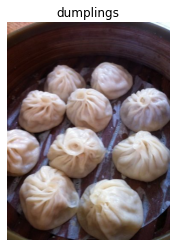

In [20]:
img = view_random_image(folder='/content/test',
                        target_class='dumplings')

### Get data ready to modelling

In [34]:
# Set random seed
tf.random.set_seed(42)

train_dir = '/content/train'
test_dir = '/content/test'

train_data = tf.data.Dataset.list_files(train_dir + '/*/*')
test_data = tf.data.Dataset.list_files(test_dir + '/*/*', shuffle=False)

In [ ]:
train_data

<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [ ]:
test_data

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [ ]:
for f in test_data.take(3):
  print(f.numpy())

b'/content/test/apple_pie/1011328.jpg'
b'/content/test/apple_pie/101251.jpg'
b'/content/test/apple_pie/1034399.jpg'


In [37]:
# Create function to get label
def get_label_from_path(file_path):
  parts = tf.strings.split(file_path, sep='/') # Separate path into parts
  label = parts[-2] == class_names
  return tf.argmax(label)

In [6]:
# Create function to decode image
def decode_img_from_path(file_path):
  img = tf.io.read_file(file_path)
  img = tf.io.decode_jpeg(img, channels=3)
  return tf.image.resize(img, size=(224, 224))

In [36]:
# Create function to get tuple (img, label)
def process_path(file_path):
  img = decode_img_from_path(file_path)
  label = get_label_from_path(file_path)
  return img, label

In [38]:
# Create training and test datasets
train_ds = train_data.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(1000).batch(32).prefetch(tf.data.AUTOTUNE)

test_ds = test_data.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

## Modelling

### Create feature extractor model

We'll try two diffrent base model:

* ResNet50 V2
* EfficientNetB0

And choose the best model to make fine-tuning model 

Create Checkpoint Callback

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
checkpoint_path = 'resnet_model_checkpoint_weights/checkpoint'
checkpoint_callback_resnet = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    save_freq='epoch',
    verbose=1
)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision

# Set global policy
mixed_precision.set_global_policy('mixed_float16')

In [ ]:
# Try ResNet50V2 model as base model
base_model_resnet = tf.keras.applications.resnet_v2.ResNet50V2(include_top=False)
base_model_resnet.trainable = False

# Create a model 
inputs = layers.Input(shape=IMG_SIZE + (3,))
x = layers.Rescaling(scale=1./127.5, offset=-1)(inputs)
x = base_model_resnet(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(101)(x)
outputs = layers.Activation('softmax', dtype=tf.float32)(x)
model_resnet = tf.keras.Model(inputs, outputs)

# Compile the model
model_resnet.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])
# Fit the model
history_resnet = model_resnet.fit(train_ds,
                                  epochs=5,
                                  steps_per_epoch=len(train_ds),
                                  validation_data=test_ds,
                                  validation_steps=int(0.2*len(test_ds)),
                                  callbacks=[checkpoint_callback_resnet])

Epoch 1/5
2368/2368 [==============================] - ETA: 0s - loss: 2.2270 - accuracy: 0.4644
Epoch 1: val_loss improved from inf to 1.68935, saving model to resnet_model_checkpoint_weights/checkpoint
2368/2368 [==============================] - 285s 114ms/step - loss: 2.2270 - accuracy: 0.4644 - val_loss: 1.6893 - val_accuracy: 0.5647
Epoch 2/5
2368/2368 [==============================] - ETA: 0s - loss: 1.6635 - accuracy: 0.5802
Epoch 2: val_loss improved from 1.68935 to 1.65433, saving model to resnet_model_checkpoint_weights/checkpoint
2368/2368 [==============================] - 268s 112ms/step - loss: 1.6635 - accuracy: 0.5802 - val_loss: 1.6543 - val_accuracy: 0.5787
Epoch 3/5
2367/2368 [============================>.] - ETA: 0s - loss: 1.4635 - accuracy: 0.6213
Epoch 3: val_loss did not improve from 1.65433
2368/2368 [==============================] - 263s 110ms/step - loss: 1.4636 - accuracy: 0.6213 - val_loss: 1.6793 - val_accuracy: 0.5793
Epoch 4/5
2368/2368 [============

In [ ]:
# Evaluate tht model_resnet on all test data
results_resnet = model_resnet.evaluate(test_ds)

790/790 [==============================] - 74s 91ms/step - loss: 1.7633 - accuracy: 0.5716


Create Checkpoint Callback

In [ ]:
checkpoint_path = '/content/drive/MyDrive/food_vision/checkpoints/efficientnetb0_model_checkpoint_weights/checkpoint'
checkpoint_callback_eff = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    save_freq='epoch',
    verbose=1
)

In [ ]:
# Try EfficientNetB0 model as base model
base_model_eff = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_eff.trainable = False

# Create a model 
inputs = layers.Input(shape=IMG_SIZE + (3,))
x = base_model_eff(inputs)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(101)(x)
outputs = layers.Activation('softmax', dtype=tf.float32)(x)
model_eff = tf.keras.Model(inputs, outputs)


# Compile the model
model_eff.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])
# Fit the model
history_eff = model_eff.fit(train_ds,
                                  epochs=5,
                                  steps_per_epoch=len(train_ds),
                                  validation_data=test_ds,
                                  validation_steps=int(0.2*len(test_ds)),
                                  callbacks=[checkpoint_callback_eff])

Epoch 1/5
2368/2368 [==============================] - ETA: 0s - loss: 1.7753 - accuracy: 0.5672
Epoch 1: val_loss improved from inf to 1.11177, saving model to /content/drive/MyDrive/food_vision/checkpoints/efficientnetb0_model_checkpoint_weights/checkpoint
2368/2368 [==============================] - 259s 105ms/step - loss: 1.7753 - accuracy: 0.5672 - val_loss: 1.1118 - val_accuracy: 0.7004
Epoch 2/5
2367/2368 [============================>.] - ETA: 0s - loss: 1.2666 - accuracy: 0.6732
Epoch 2: val_loss improved from 1.11177 to 1.01869, saving model to /content/drive/MyDrive/food_vision/checkpoints/efficientnetb0_model_checkpoint_weights/checkpoint
2368/2368 [==============================] - 234s 98ms/step - loss: 1.2666 - accuracy: 0.6732 - val_loss: 1.0187 - val_accuracy: 0.7225
Epoch 3/5
2367/2368 [============================>.] - ETA: 0s - loss: 1.1301 - accuracy: 0.7042
Epoch 3: val_loss improved from 1.01869 to 0.98874, saving model to /content/drive/MyDrive/food_vision/check

In [ ]:
# Evaluate model on all data
eff_results = model_eff.evaluate(test_ds)

790/790 [==============================] - 82s 102ms/step - loss: 0.9685 - accuracy: 0.7370


In [ ]:
# Make function to visualize loss curves
def plot_loss_curves(history):
  plt.figure(figsize=(20,7)),
  
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Training set')
  plt.plot(history.history['val_loss'], label='Validation set')
  plt.title('Loss')
  plt.legend
  
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Training set')
  plt.plot(history.history['val_accuracy'], label='Validation set')
  plt.title('Accuracy')
  plt.legend

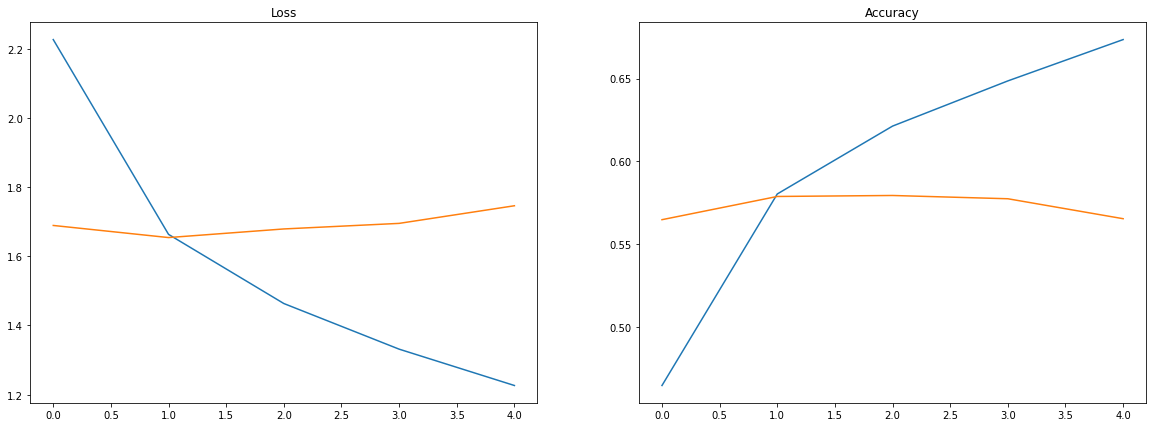

In [ ]:
plot_loss_curves(history_resnet)

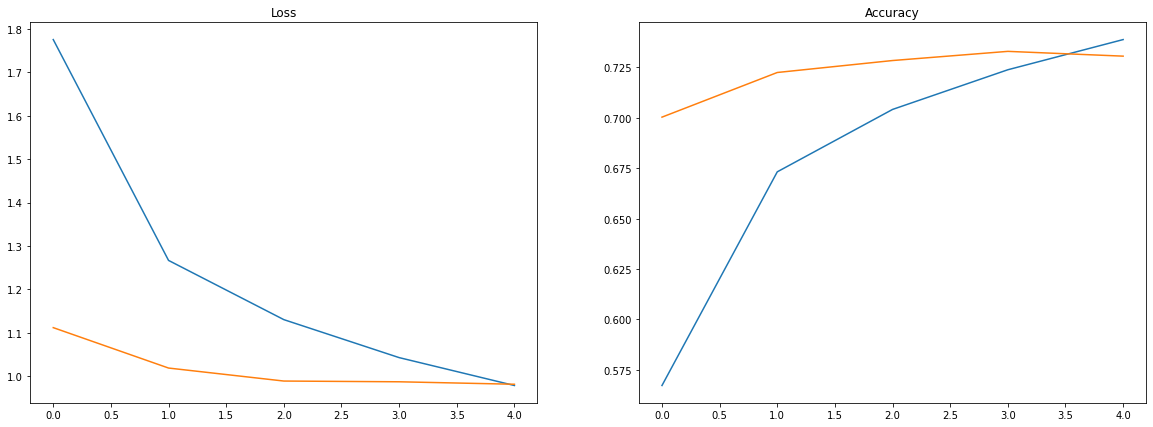

In [ ]:
plot_loss_curves(history_eff)

Since EfficientNetB0 base model gives the best accuracy, we'll use it to fine-tuning model

### Create fine-tuning model

Create Callbacks

In [ ]:
# Create Model Checkpoint callback
checkpoint_path = '/content/drive/MyDrive/food_vision/checkpoints/efficientnetb0_fine_tuning_model_checkpoint_weights/checkpoint'
checkpoint_callback_fine = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    save_freq='epoch',
    verbose=1
)

# Create Early Stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)

# Creating learning rate reduction callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",  
                                                 factor=0.2,
                                                 patience=2,
                                                 verbose=1,
                                                 min_lr=1e-7)

We have 750 images per label, that's enough to train all layers in base model

In [ ]:
# Unfreeze all layers
base_model_eff.trainable = True

# Compile the model
model_eff.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                     metrics=['accuracy'])
# Fit the model
history_eff_fine = model_eff.fit(train_ds,
                                  epochs=100,
                                  steps_per_epoch=len(train_ds),
                                  validation_data=test_ds,
                                  validation_steps=int(0.2*len(test_ds)),
                                  initial_epoch=history_eff.epoch[-1],
                                  callbacks=[checkpoint_callback_fine, early_stopping, reduce_lr])

Epoch 5/100
2368/2368 [==============================] - ETA: 0s - loss: 1.3956 - accuracy: 0.6352
Epoch 5: val_loss improved from inf to 1.27907, saving model to /content/drive/MyDrive/food_vision/checkpoints/efficientnetb0_fine_tuning_model_checkpoint_weights/checkpoint
2368/2368 [==============================] - 501s 190ms/step - loss: 1.3956 - accuracy: 0.6352 - val_loss: 1.2791 - val_accuracy: 0.6638 - lr: 0.0010
Epoch 6/100
2368/2368 [==============================] - ETA: 0s - loss: 1.0021 - accuracy: 0.7311
Epoch 6: val_loss improved from 1.27907 to 0.92918, saving model to /content/drive/MyDrive/food_vision/checkpoints/efficientnetb0_fine_tuning_model_checkpoint_weights/checkpoint
2368/2368 [==============================] - 449s 189ms/step - loss: 1.0021 - accuracy: 0.7311 - val_loss: 0.9292 - val_accuracy: 0.7472 - lr: 0.0010
Epoch 7/100
2368/2368 [==============================] - ETA: 0s - loss: 0.8237 - accuracy: 0.7704
Epoch 7: val_loss did not improve from 0.92918
2368

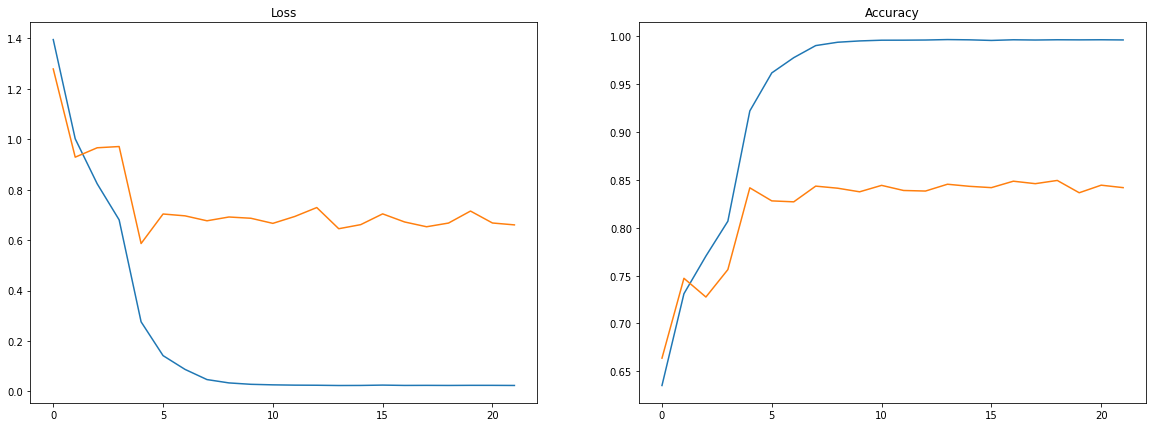

In [ ]:
plot_loss_curves(history_eff_fine)

In [56]:
model_eff.evaluate(test_ds)

790/790 [==============================] - 82s 90ms/step - loss: 0.6291 - accuracy: 0.8335


[0.6291314363479614, 0.8335445523262024]

## Evaluate our model

### Get predictions and true labels

In [49]:
# Get filenames of images in test set
file_names = list(test_data.as_numpy_iterator())

In [ ]:
file_names[:5]

[b'/content/test/apple_pie/1011328.jpg',
 b'/content/test/apple_pie/101251.jpg',
 b'/content/test/apple_pie/1034399.jpg',
 b'/content/test/apple_pie/103801.jpg',
 b'/content/test/apple_pie/1038694.jpg']

In [57]:
# Get true labels from test set
y_true = np.array(list(test_data.map(get_label_from_path)))

In [ ]:
y_true[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
# Get predictions from our model
predictions = model_eff.predict(test_ds)

790/790 [==============================] - 65s 80ms/step


In [59]:
# Get predict label
y_pred = predictions.argmax(axis=1)

In [60]:
# Get probability of predict label
probability = predictions.max(axis=1)

### Make confusion matrix

In [ ]:
# Create function for confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def make_confusion_matrix(y_true, y_pred, labels, figsize=(90,90), text_size=10):
  conf_mat=confusion_matrix(y_true, y_pred)

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set(title='Consusion matrix',
         xlabel='Predicted label',
         ylabel='True label',
         xticks=np.arange(conf_mat.shape[0]),
         yticks=np.arange(conf_mat.shape[1]),
         xticklabels=labels,
         yticklabels=labels)
  
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom

  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (conf_mat.max() + conf_mat.min())/2

  for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
    plt.text(j, i, f'{conf_mat[i,j]}',
             color = 'white' if conf_mat[i,j] > threshold else 'black',
             size=text_size)

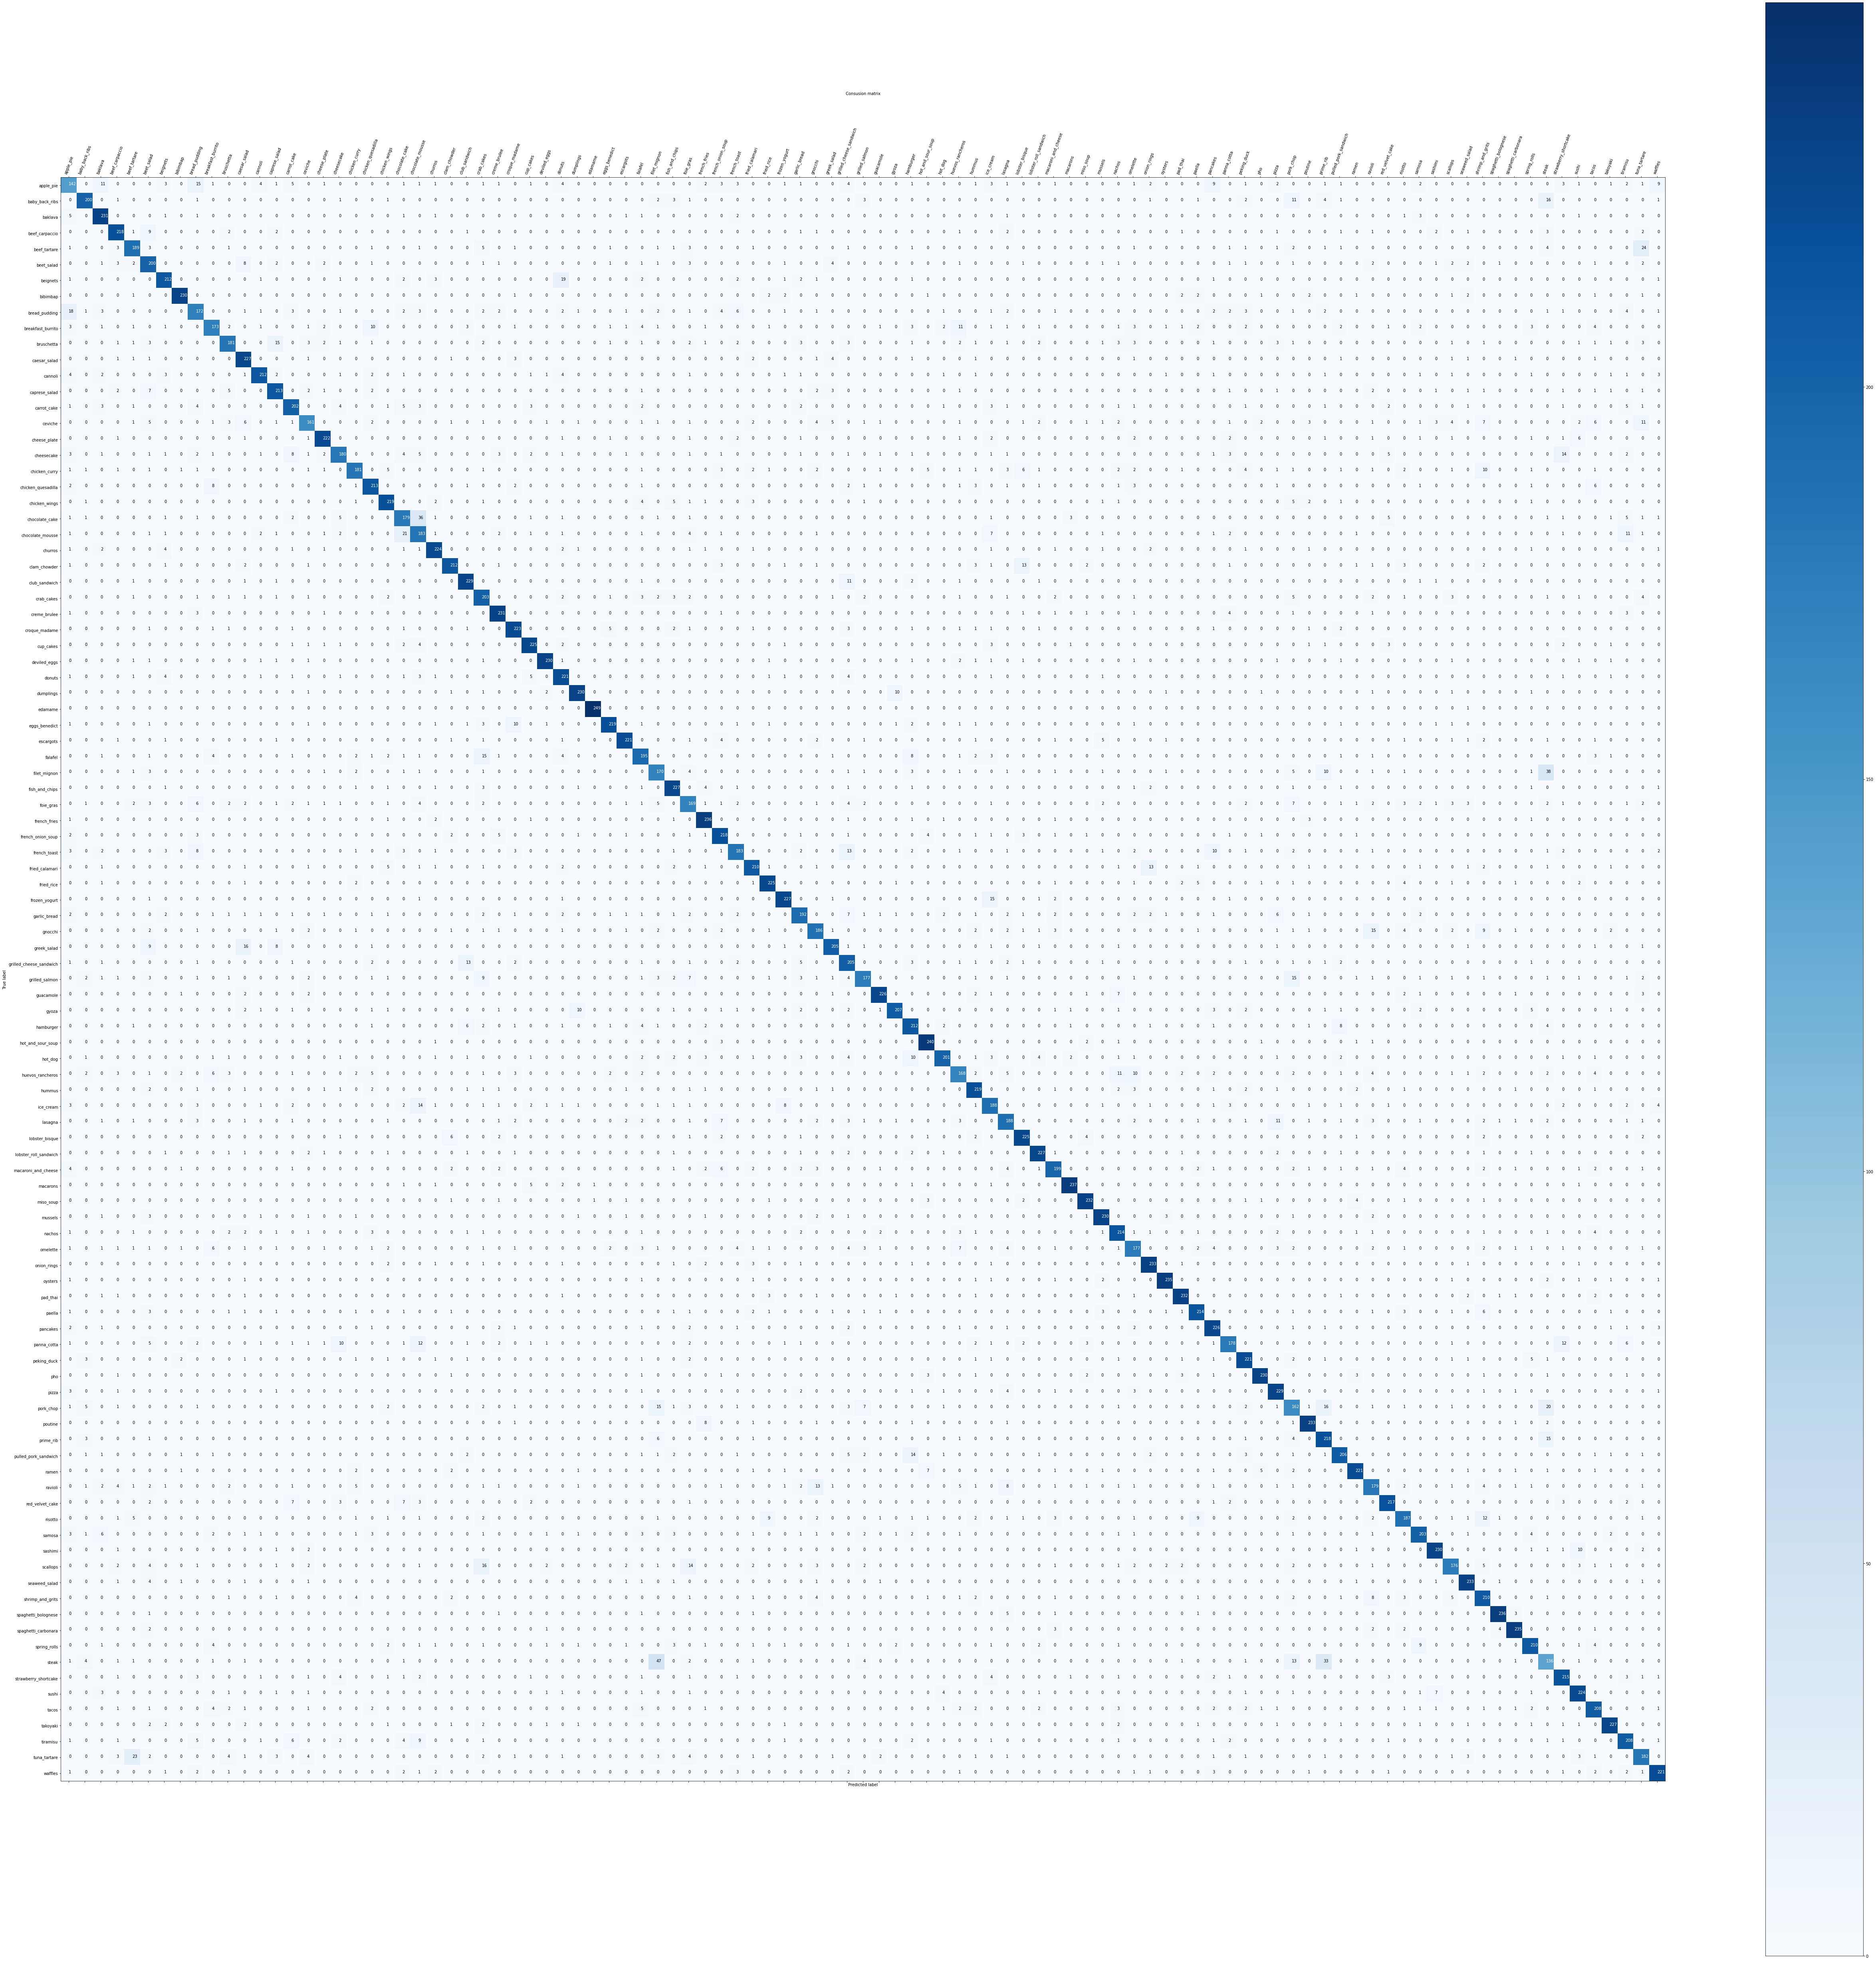

In [ ]:
make_confusion_matrix(y_true=y_true, y_pred=y_pred, labels=class_names, figsize=(90,90), text_size=10)

In general, according to the results of confusion matrix, the model showed good results, although there are errors. 

It is necessary to explore where exactly the model is mistaken.


We'll create DataFrame with true label and preict label and explor where their mismatch happens

### Make DataFrame with true and predict labels of each image

In [77]:
# Create Pandas DataFrame with true and predict labels
import pandas as pd
df = pd.DataFrame({'Image_filename':file_names,
                   'y_true':y_true,
                   'y_pred':y_pred,
                   'true_label':[class_names[i] for i in y_true],
                   'predict_label':[class_names[i] for i in y_pred],
                   'probability':probability})

In [23]:
df.head(5)

Image_filename  y_true  y_pred true_label  \
0  b'/content/test/apple_pie/1011328.jpg'       0      85  apple_pie   
1   b'/content/test/apple_pie/101251.jpg'       0       0  apple_pie   
2  b'/content/test/apple_pie/1034399.jpg'       0       0  apple_pie   
3   b'/content/test/apple_pie/103801.jpg'       0       0  apple_pie   
4  b'/content/test/apple_pie/1038694.jpg'       0       0  apple_pie   

  predict_label  probability  
0        samosa     0.988626  
1     apple_pie     0.512001  
2     apple_pie     0.572178  
3     apple_pie     0.731286  
4     apple_pie     0.999665

### Make DataFrame with wrong predictions

In [63]:
all_wrong = df.query('y_true != y_pred').sort_values(['true_label'])
all_wrong.head(20)

Image_filename  y_true  y_pred true_label  \
0    b'/content/test/apple_pie/1011328.jpg'       0      85  apple_pie   
187  b'/content/test/apple_pie/3635782.jpg'       0      14  apple_pie   
184  b'/content/test/apple_pie/3603821.jpg'       0      72  apple_pie   
179  b'/content/test/apple_pie/3547012.jpg'       0       8  apple_pie   
178  b'/content/test/apple_pie/3521500.jpg'       0      98  apple_pie   
177  b'/content/test/apple_pie/3517723.jpg'       0     100  apple_pie   
176  b'/content/test/apple_pie/3505644.jpg'       0       2  apple_pie   
175  b'/content/test/apple_pie/3497884.jpg'       0       9  apple_pie   
172  b'/content/test/apple_pie/3466310.jpg'       0      31  apple_pie   
170  b'/content/test/apple_pie/3463862.jpg'       0      72  apple_pie   
166  b'/content/test/apple_pie/3365558.jpg'       0      72  apple_pie   
163  b'/content/test/apple_pie/3314985.jpg'       0     100  apple_pie   
158  b'/content/test/apple_pie/3270291.jpg'       0      95  apple_pie   
156  b'/content/test/apple_pie/3267436.jpg'       0       8  apple_pie   
153  b'/content/test/apple_pie/3243441.jpg'       0      14  apple_pie   
151  b'/content/test/apple_pie/3240840.jpg'       0     100  apple_pie   
149  b'/content/test/apple_pie/3214268.jpg'       0       8  apple_pie   
148   b'/content/test/apple_pie/317970.jpg'       0      40  apple_pie   
147  b'/content/test/apple_pie/3160240.jpg'       0      76  apple_pie   
145  b'/content/test/apple_pie/3068872.jpg'       0      12  apple_pie   

         predict_label  probability  
0               samosa     0.988626  
187        carrot_cake     0.452675  
184           pancakes     0.262634  
179      bread_pudding     0.590849  
178           tiramisu     0.491292  
177            waffles     0.511905  
176            baklava     0.948297  
175  breakfast_burrito     0.423953  
172             donuts     0.905171  
170           pancakes     0.737238  
166           pancakes     0.249046  
163            waffles     0.759695  
158              sushi     0.378840  
156      bread_pudding     0.992568  
153        carrot_cake     0.630512  
151            waffles     0.234893  
149      bread_pudding     0.639798  
148       french_fries     0.466018  
147              pizza     0.685520  
145            cannoli     0.623408

In [ ]:
all_wrong['true_label'].value_counts()[:15]

steak                114
apple_pie            108
ceviche               89
pork_chop             88
huevos_rancheros      82
foie_gras             81
filet_mignon          80
bread_pudding         78
breakfast_burrito     77
scallops              74
grilled_salmon        73
omelette              73
panna_cotta           72
chocolate_cake        71
ravioli               71
Name: true_label, dtype: int64

How we can see the greatest number of errors happens when model try to predict `steak` and `apple_pie`

#### DataFrame with errors in `steak` definition



In [64]:
steak_wrong = all_wrong.query("true_label == 'steak'")

In [37]:
steak_wrong['predict_label'].value_counts()

filet_mignon           47
prime_rib              33
pork_chop              13
grilled_salmon          4
baby_back_ribs          4
foie_gras               2
apple_pie               1
beef_tartare            1
pad_thai                1
beef_carpaccio          1
chocolate_cake          1
sushi                   1
caesar_salad            1
peking_duck             1
breakfast_burrito       1
fried_calamari          1
spaghetti_carbonara     1
Name: predict_label, dtype: int64

In [65]:
steak_top_wrong = steak_wrong.query("predict_label == 'filet_mignon' or predict_label == 'prime_rib' or predict_label == 'pork_chop'").sort_values('predict_label')

In [48]:
steak_top_wrong.head(10)

Image_filename  y_true  y_pred true_label  \
23449   b'/content/test/steak/504349.jpg'      93      37      steak   
23478   b'/content/test/steak/776184.jpg'      93      37      steak   
23473   b'/content/test/steak/717293.jpg'      93      37      steak   
23468   b'/content/test/steak/673127.jpg'      93      37      steak   
23464    b'/content/test/steak/66183.jpg'      93      37      steak   
23462   b'/content/test/steak/647683.jpg'      93      37      steak   
23443   b'/content/test/steak/459522.jpg'      93      37      steak   
23359  b'/content/test/steak/2756200.jpg'      93      37      steak   
23301  b'/content/test/steak/1848046.jpg'      93      37      steak   
23297  b'/content/test/steak/1718949.jpg'      93      37      steak   

      predict_label  probability  
23449  filet_mignon     0.543051  
23478  filet_mignon     0.378713  
23473  filet_mignon     0.744971  
23468  filet_mignon     0.515000  
23464  filet_mignon     0.986872  
23462  filet_mignon     0.577026  
23443  filet_mignon     0.967585  
23359  filet_mignon     0.502597  
23301  filet_mignon     0.781742  
23297  filet_mignon     0.508448

Let's visualize wrong predictions

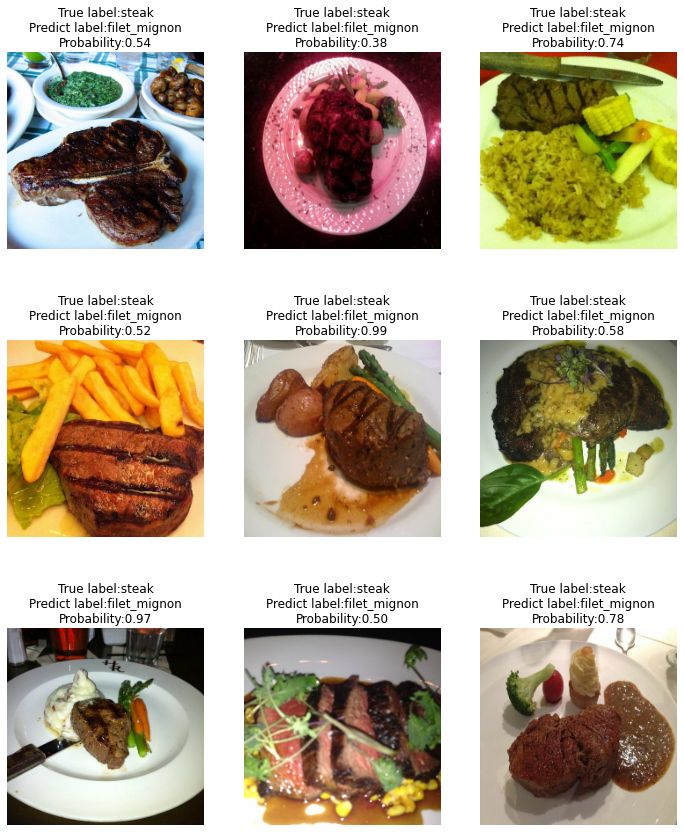

In [69]:
images = 9
index = 0
plt.figure(figsize=(12,15))
for i, row in enumerate(steak_top_wrong[index:index+images].itertuples()):
   plt.subplot(3, 3, i+1)
   img = decode_img_from_path(row[1])
   plt.imshow(img/255.)
   plt.title(f'True label:{row[4]}\nPredict label:{row[5]}\nProbability:{row[6]:.2f}')
   plt.axis(False)

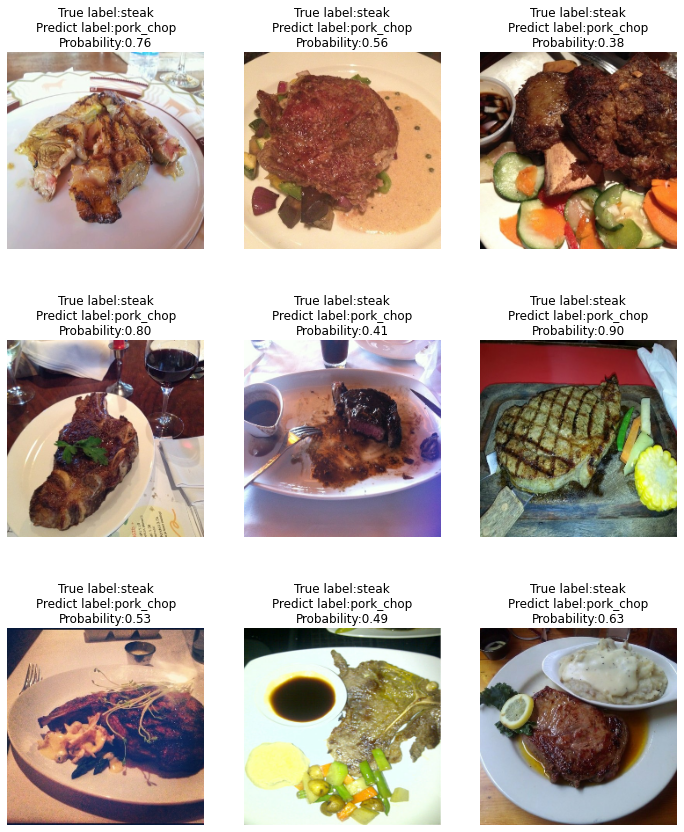

In [84]:
images = 9
index = 47
plt.figure(figsize=(12,15))
for i, row in enumerate(steak_top_wrong[index:index+images].itertuples()):
   plt.subplot(3, 3, i+1)
   img = decode_img_from_path(row[1])
   plt.imshow(img/255.)
   plt.title(f'True label:{row[4]}\nPredict label:{row[5]}\nProbability:{row[6]:.2f}')
   plt.axis(False)

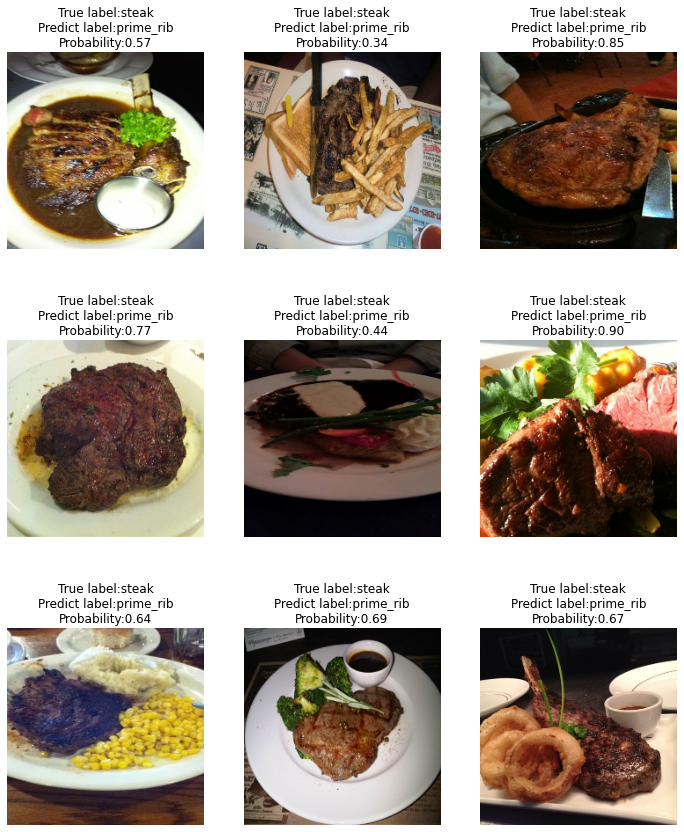

In [83]:
images = 9
index = 83
plt.figure(figsize=(12,15))
for i, row in enumerate(steak_top_wrong[index:index+images].itertuples()):
   plt.subplot(3, 3, i+1)
   img = decode_img_from_path(row[1])
   plt.imshow(img/255.)
   plt.title(f'True label:{row[4]}\nPredict label:{row[5]}\nProbability:{row[6]:.2f}')
   plt.axis(False)

After visualizing wrong predictions, it can be concluded that the model is wrong in definition of the **type of steaks**.


To more accurately determine the type of steak, we need to add more data for each of the classes (`steak`, `filet_mignon`, `prime_rib` and `pork_chop`)

#### DataFrame with errors in `apple_pie` definition


In [70]:
apple_pie_wrong = all_wrong.query("true_label == 'apple_pie'")

In [30]:
apple_pie_wrong['predict_label'].value_counts()

bread_pudding              15
baklava                    11
pancakes                    9
waffles                     9
carrot_cake                 5
grilled_cheese_sandwich     4
donuts                      4
cannoli                     4
strawberry_shortcake        3
french_onion_soup           3
french_toast                3
beignets                    3
ice_cream                   3
samosa                      2
onion_rings                 2
pizza                       2
french_fries                2
tiramisu                    2
chocolate_mousse            1
macaroni_and_cheese         1
creme_brulee                1
chocolate_cake              1
caprese_salad               1
lasagna                     1
takoyaki                    1
hummus                      1
cup_cakes                   1
cheese_plate                1
churros                     1
hamburger                   1
crab_cakes                  1
omelette                    1
tuna_tartare                1
peking_duc

In [71]:
apple_pie_top_wrong = apple_pie_wrong.query("predict_label == 'bread_pudding' or predict_label == 'baklava' or predict_label == 'pancakes' or predict_label == 'waffles'").sort_values('predict_label')

In [35]:
apple_pie_top_wrong.head(10)

Image_filename  y_true  y_pred true_label  \
49   b'/content/test/apple_pie/1774036.jpg'       0       2  apple_pie   
116  b'/content/test/apple_pie/2629959.jpg'       0       2  apple_pie   
176  b'/content/test/apple_pie/3505644.jpg'       0       2  apple_pie   
155  b'/content/test/apple_pie/3257241.jpg'       0       2  apple_pie   
223   b'/content/test/apple_pie/661475.jpg'       0       2  apple_pie   
98    b'/content/test/apple_pie/246113.jpg'       0       2  apple_pie   
34   b'/content/test/apple_pie/1514110.jpg'       0       2  apple_pie   
133  b'/content/test/apple_pie/2909139.jpg'       0       2  apple_pie   
60   b'/content/test/apple_pie/2038171.jpg'       0       2  apple_pie   
229   b'/content/test/apple_pie/807000.jpg'       0       2  apple_pie   

    predict_label  probability  
49        baklava     0.890450  
116       baklava     0.470270  
176       baklava     0.948297  
155       baklava     0.979739  
223       baklava     0.431023  
98        baklava     0.121105  
34        baklava     0.975650  
133       baklava     0.278801  
60        baklava     0.909260  
229       baklava     0.969969

Let's visualize wrong predictions

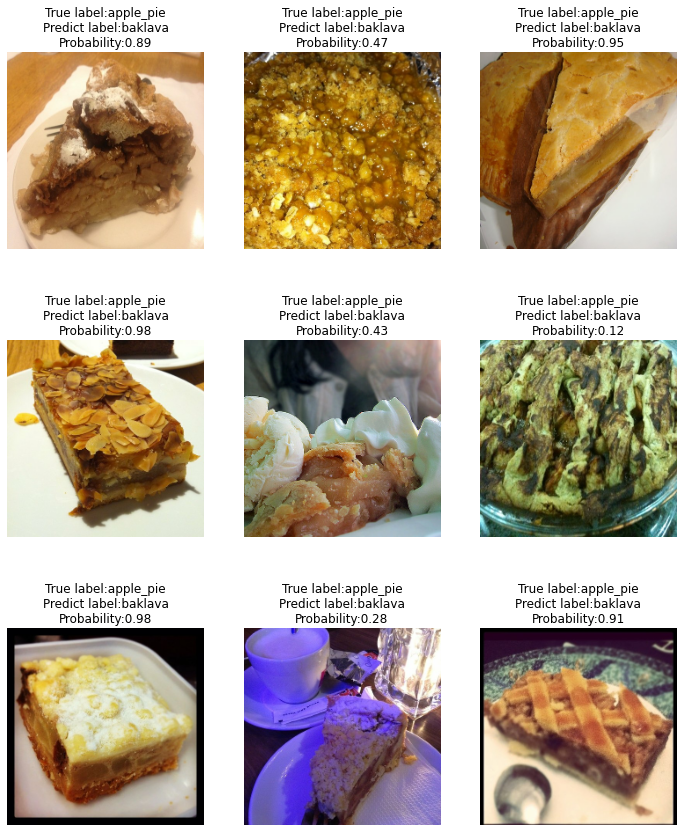

In [72]:
images = 9
index = 0
plt.figure(figsize=(12,15))
for i, row in enumerate(apple_pie_top_wrong[index:index+images].itertuples()):
   plt.subplot(3, 3, i+1)
   img = decode_img_from_path(row[1])
   plt.imshow(img/255.)
   plt.title(f'True label:{row[4]}\nPredict label:{row[5]}\nProbability:{row[6]:.2f}')
   plt.axis(False)

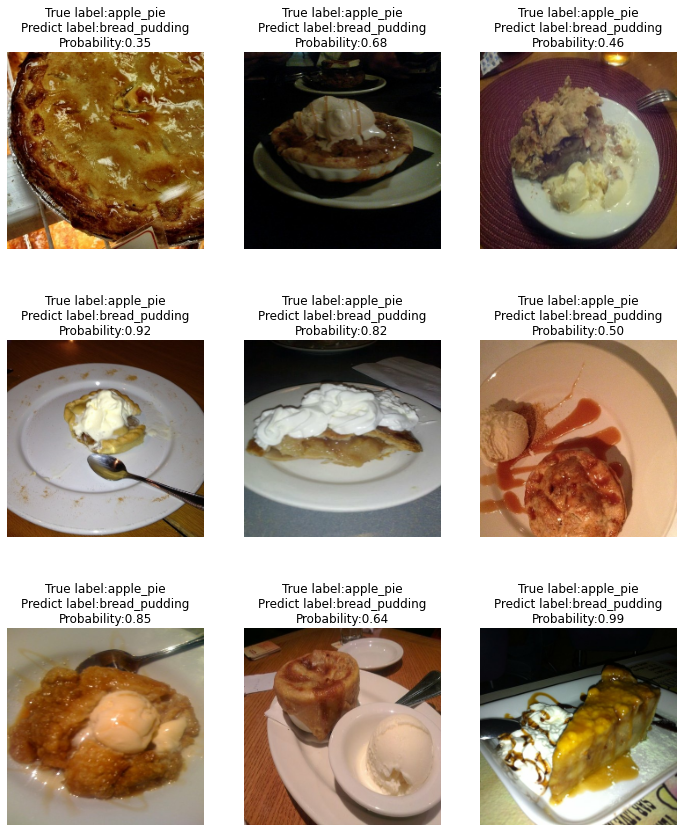

In [73]:
images = 9
index = 11
plt.figure(figsize=(12,15))
for i, row in enumerate(apple_pie_top_wrong[index:index+images].itertuples()):
   plt.subplot(3, 3, i+1)
   img = decode_img_from_path(row[1])
   plt.imshow(img/255.)
   plt.title(f'True label:{row[4]}\nPredict label:{row[5]}\nProbability:{row[6]:.2f}')
   plt.axis(False)

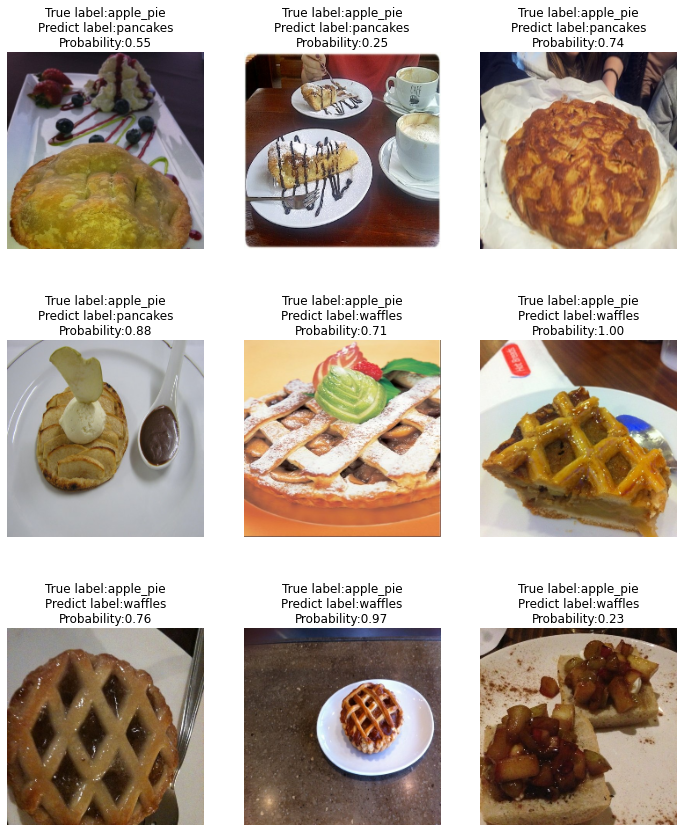

In [74]:
images = 9
index = 31
plt.figure(figsize=(12,15))
for i, row in enumerate(apple_pie_top_wrong[index:index+images].itertuples()):
   plt.subplot(3, 3, i+1)
   img = decode_img_from_path(row[1])
   plt.imshow(img/255.)
   plt.title(f'True label:{row[4]}\nPredict label:{row[5]}\nProbability:{row[6]:.2f}')
   plt.axis(False)

In general, from the results of the visualization, it becomes clear why the model made a mistakes, the images with predict label `bread_pudding ` really looks like an images of a pudding, etc.

So we need to add more data for each of this classes

#### DataFrame with most wrong predictions

Now let's see most wrong predictions (with the highest probability) and visualize this images with true and predict label

In [78]:
top_100_wrong = df.query('y_true != y_pred').sort_values(['probability'], ascending=False)[:100]
top_100_wrong.head(10)

Image_filename  y_true  y_pred  \
17780            b'/content/test/paella/1393594.jpg'      71      87   
11642      b'/content/test/garlic_bread/2957596.jpg'      46      10   
16271           b'/content/test/mussels/1407674.jpg'      65      69   
23882             b'/content/test/sushi/3113131.jpg'      95      30   
19106             b'/content/test/pizza/2542065.jpg'      76      13   
14046  b'/content/test/huevos_rancheros/1696753.jpg'      56       9   
561             b'/content/test/baklava/1795930.jpg'       2      23   
19963           b'/content/test/prime_rib/50193.jpg'      79       1   
1336         b'/content/test/beet_salad/2199309.jpg'       5      11   
16151          b'/content/test/miso_soup/312662.jpg'      64      54   

             true_label      predict_label  probability  
17780            paella           scallops     0.999999  
11642      garlic_bread         bruschetta     0.999995  
16271           mussels            oysters     0.999995  
23882             sushi       deviled_eggs     0.999968  
19106             pizza      caprese_salad     0.999912  
14046  huevos_rancheros  breakfast_burrito     0.999892  
561             baklava            churros     0.999840  
19963         prime_rib     baby_back_ribs     0.999801  
1336         beet_salad       caesar_salad     0.999780  
16151         miso_soup  hot_and_sour_soup     0.999736

In [ ]:
top_100_wrong['true_label'].value_counts()

beef_tartare               5
scallops                   5
fried_calamari             5
paella                     4
greek_salad                3
                          ..
grilled_cheese_sandwich    1
huevos_rancheros           1
samosa                     1
pizza                      1
foie_gras                  1
Name: true_label, Length: 61, dtype: int64

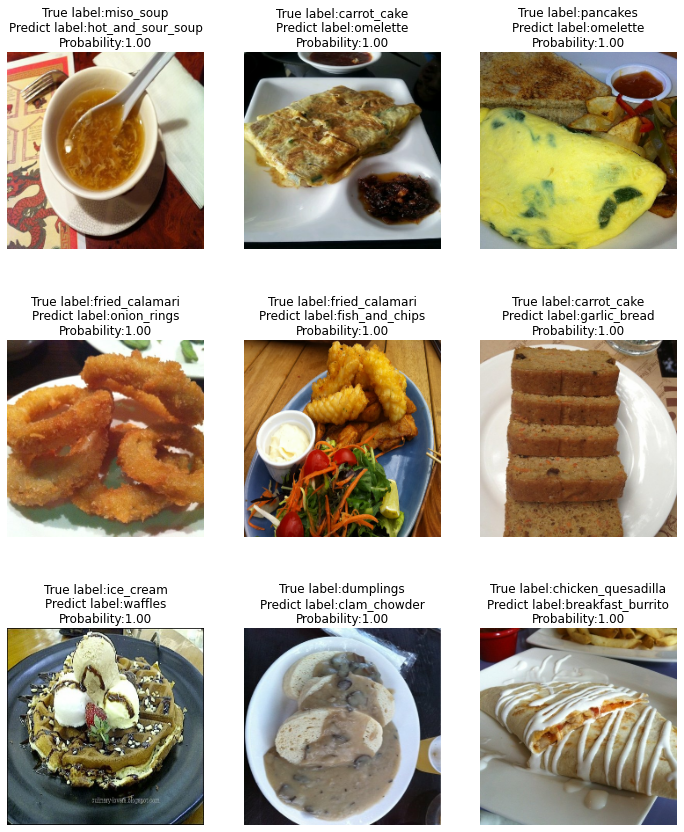

In [79]:
# Visualize top_100_wrong
images = 9
index = 9
plt.figure(figsize=(12,15))
for i, row in enumerate(top_100_wrong[index:index+images].itertuples()):
   plt.subplot(3, 3, i+1)
   img = decode_img_from_path(row[1])
   plt.imshow(img/255.)
   plt.title(f'True label:{row[4]}\nPredict label:{row[5]}\nProbability:{row[6]:.2f}')
   plt.axis(False)
   


* some errors are due to almost half the same appearance (e.g. `onion_rings` and `fried_calamari`)
* some due to the presence of several dishes in the image
* some due to incorrect true_label (e.g. the middle image in the bottom row)

## Conclusions

The EfficientNetB0 model showed excellent results in the classification of food images, the accuracy was **83.3%**, the errors made by the model are quite understandable and can be corrected by more data and more accurate assignment of labels.
